# Cats and Dog image

### 1) Library

In [1]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array

### 2) train folder

In [2]:
TRAIN_DIR = './MyImage/trainSet/'

In [3]:
train_folder_list = array(os.listdir(TRAIN_DIR))

In [4]:
train_input = []
train_label = []

In [5]:
label_encoder = LabelEncoder()  # LabelEncoder Class 호출
integer_encoded = label_encoder.fit_transform(train_folder_list)
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [6]:
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        train_input.append([np.array(img)])
        train_label.append([np.array(onehot_encoded[index])])

In [7]:
len(img)

84

In [8]:
train_input = np.reshape(train_input, (-1, 7056))
train_label = np.reshape(train_label, (-1, 2))
train_input = np.array(train_input).astype(np.float32)
train_label = np.array(train_label).astype(np.float32)
np.save("train_input.npy", train_input)
np.save("train_label.npy", train_label)

In [9]:
train_input

array([[144., 149., 153., ..., 193., 198., 197.],
       [ 62.,  65.,  68., ..., 209., 204., 202.],
       [149., 146., 147., ..., 212., 213., 212.],
       ...,
       [249., 250., 250., ..., 216., 213., 210.],
       [231., 228., 228., ..., 231., 231., 231.],
       [218., 218., 218., ...,  53.,  53.,  55.]], dtype=float32)

In [10]:
train_input.shape

(60, 7056)

### 3) Test data

In [11]:
TEST_DIR = './MyImage/testSet/'
test_folder_list = array(os.listdir(TEST_DIR))
 
test_input = []
test_label = []
 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test_folder_list)
 
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
 
for index in range(len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        test_input.append([np.array(img)])
        test_label.append([np.array(onehot_encoded[index])])

test_input = np.reshape(test_input, (-1, 7056))
test_label = np.reshape(test_label, (-1, 2))
test_input = np.array(test_input).astype(np.float32)
test_label = np.array(test_label).astype(np.float32)
np.save("test_input.npy",test_input)
np.save("test_label.npy",test_label)

In [12]:
print(train_input.shape, test_input.shape)

(60, 7056) (20, 7056)


### 4) Parameters and Model

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [14]:
seed = 42
tf.set_random_seed(seed)
np.random.seed(seed)

In [15]:
epoch_size = 10
batch_size = 10
learning_rate=0.001

In [16]:
X = tf.placeholder(tf.float32, [None, 84, 84, 1])
Y = tf.placeholder(tf.float32, [None, 2])
keep_prob = tf.placeholder(tf.float32)

In [17]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [18]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [19]:
L2.get_shape()

TensorShape([Dimension(None), Dimension(21), Dimension(21), Dimension(64)])

In [20]:
W3 = tf.Variable(tf.random_normal([21 * 21 * 64, 7056], stddev=0.01))
L3 = tf.reshape(L2, [-1, 21 * 21 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)
W4 = tf.Variable(tf.random_normal([7056, 2], stddev=0.01))
final = tf.matmul(L3, W4)

W1111 12:21:25.645351  7596 deprecation.py:506] From <ipython-input-20-b557c3fb6263>:5: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=final, labels=Y))  # 다항 분류일 경우
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=final, labels=Y))

W1111 12:21:25.726041  7596 deprecation.py:323] From C:\Users\youngjae.kim\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
opt = tf.train.AdamOptimizer(learning_rate)
train_step = opt.minimize(loss)

In [23]:
prediction = tf.argmax(final, 1) # true_class
correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [24]:
sess=tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [25]:
train_loss = []

for epoch in range(epoch_size):
    avg_cost = 0
    total_batch = int(len(train_input) / batch_size)
    
    pbar = tqdm(range(total_batch))
    
    for i in pbar:
        start = ((i + 1) * batch_size) - batch_size
        end = ((i + 1) * batch_size)
        batch_xs = train_input[start:end]
        batch_ys = train_label[start:end]
        batch_xs = batch_xs.reshape(-1, 84, 84, 1)
        batch_ys = train_label[start:end]
        
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        
        c, _ = sess.run([loss, train_step], feed_dict=feed_dict)
        train_loss.append(c)
        avg_cost += c / total_batch
        pbar.set_description("loss : %f" % avg_cost)
        
print('Accuracy:', sess.run(accuracy, feed_dict={X: test_input.reshape(-1, 84, 84, 1), 
                                                 Y: test_label, keep_prob: 1}))

loss : 0.690943: 100%|███████████████████████████████████████████████████████████████████| 6/6 [00:27<00:00,  4.55s/it]


Accuracy: 0.45


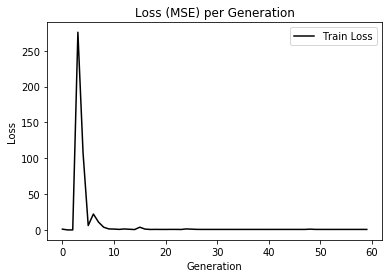

In [26]:
plt.plot(train_loss, 'k-', label='Train Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [28]:
pred_train = sess.run(prediction, feed_dict={X: train_input.reshape(-1, 84, 84,1), Y: train_label, keep_prob: 1})
labels_train = sess.run(tf.argmax(train_label, 1))
print(confusion_matrix(labels_train.flatten(), pred_train))

[[ 7 23]
 [ 1 29]]


In [29]:
target_names = ['false', 'true']

In [30]:
print(classification_report(labels_train.flatten(), pred_train, target_names=target_names))
precision_score(labels_train.flatten(), pred_train, average='binary',pos_label=1)
recall_score(labels_train.flatten(), pred_train, average='binary',pos_label=1)

             precision    recall  f1-score   support

      false       0.88      0.23      0.37        30
       true       0.56      0.97      0.71        30

avg / total       0.72      0.60      0.54        60



0.9666666666666667

In [31]:
pred_test = sess.run(prediction, feed_dict={X: test_input.reshape(-1, 84, 84, 1), Y: test_label, keep_prob : 1})
labels_test = sess.run(tf.argmax(test_label, 1))
print(confusion_matrix(labels_test.flatten(), pred_test))

[[1 9]
 [2 8]]


In [32]:
print(classification_report(labels_test.flatten(), pred_test, target_names=target_names))
precision_score(labels_test.flatten(), pred_test, average='binary',pos_label=1)
recall_score(labels_test.flatten(), pred_test, average='binary',pos_label=1)

             precision    recall  f1-score   support

      false       0.33      0.10      0.15        10
       true       0.47      0.80      0.59        10

avg / total       0.40      0.45      0.37        20



0.8